In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [11]:
# load the dataset
data = fetch_california_housing()
housing_data = pd.DataFrame(data.data, columns=data.feature_names)
housing_data['Price'] = data.target

# split the data into features and targets
x = housing_data.drop(labels=['Price'], axis=1).values
y = housing_data['Price'].values

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# reshape y_train and y_test
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [12]:
# define the linear regression
class LinearRegression:

  def __init__(self, num_features, learning_rate, num_iterations, sigma=0.01):
    self.num_features = num_features
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.w = np.random.normal(0, sigma, (num_features, 1))
    self.b = 0
    self.loss_history = []

  def forward(self, x):
    return np.dot(x, self.w) + self.b

  def loss(self, y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

  def optimize(self, x, y_true, y_pred):
    m = len(y_true)
    dw = -(2 / m) * np.dot(x.T, (y_true - y_pred))
    db = -(2 / m) * np.sum(y_true - y_pred)
    self.w -= self.learning_rate * dw
    self.b -= self.learning_rate * db

  def fit(self, x, y_true):
    for i in range(self.num_iterations):
      y_pred = self.forward(x)
      loss = self.loss(y_true, y_pred)
      self.loss_history.append(loss)
      self.optimize(x, y_true, y_pred)

      if i % 10 == 0:
        print(f"iteration: {i}, loss: {loss:.4f}")

  def predict(self, x):
    return self.forward(x)

In [13]:
# hyperparameters
learning_rate = 0.01
num_iterations = 1000

# instantiate the model
model = LinearRegression(num_features=x_train.shape[1], learning_rate=learning_rate, num_iterations=num_iterations)

# train the model
model.fit(x_train, y_train)

iteration: 0, loss: 5.6539
iteration: 10, loss: 3.9836
iteration: 20, loss: 2.8714
iteration: 30, loss: 2.1292
iteration: 40, loss: 1.6332
iteration: 50, loss: 1.3010
iteration: 60, loss: 1.0780
iteration: 70, loss: 0.9279
iteration: 80, loss: 0.8265
iteration: 90, loss: 0.7577
iteration: 100, loss: 0.7106
iteration: 110, loss: 0.6782
iteration: 120, loss: 0.6556
iteration: 130, loss: 0.6396
iteration: 140, loss: 0.6280
iteration: 150, loss: 0.6194
iteration: 160, loss: 0.6128
iteration: 170, loss: 0.6077
iteration: 180, loss: 0.6035
iteration: 190, loss: 0.6000
iteration: 200, loss: 0.5970
iteration: 210, loss: 0.5943
iteration: 220, loss: 0.5918
iteration: 230, loss: 0.5896
iteration: 240, loss: 0.5874
iteration: 250, loss: 0.5854
iteration: 260, loss: 0.5836
iteration: 270, loss: 0.5817
iteration: 280, loss: 0.5800
iteration: 290, loss: 0.5783
iteration: 300, loss: 0.5767
iteration: 310, loss: 0.5751
iteration: 320, loss: 0.5736
iteration: 330, loss: 0.5722
iteration: 340, loss: 0.5

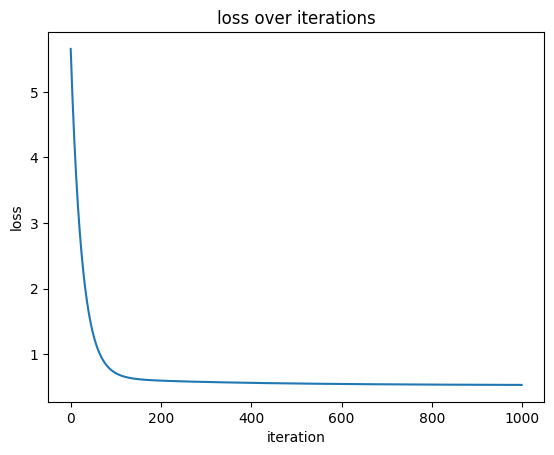

In [14]:
# plot the loss history
plt.plot(model.loss_history)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss over iterations')
plt.show()

In [15]:
# calculate MSE on the test set
predictions = model.predict(x_test)
mse = np.mean((predictions - y_test) ** 2)

print(f"MSE on test set: {mse:.4f}")

MSE on test set: 0.5299
